In [13]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

#Configure Matplotlib plotting
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11,9

In [14]:
# Load my EDA helper function created to do some high-level analysis
class EDA():

    df = pd.DataFrame()
    
    def __init__(self, df):
        '''
        Creates EDA object for the DataFrame
        
        Note for time series data, have the index be the timestamp prior to creating this Object.
        
        :param df : DataFrame
        '''
        self.df = df
        
    def missing_values(self):
        '''
        Checks missing values
        
        :return DataFrame
        
        '''
        missing = self.df[self.df.isna().any(axis=1)]
        
        print("Missing values data")
        
        return missing
    
    def duplicate_values(self):
        duplicates = self.df[self.df.duplicated(subset=None, keep='first')==True]
        
        print("Duplicate values data")
        
        return duplicates
        
    def duplicate_indices(self):
        '''
        Check whether the indices have any duplicates
        
        :return DataFrame
        '''        
        duplicate_indices = self.df[self.df.index.duplicated()==True]
        
        print("Duplicate indices")
        
        return duplicate_indices
            
    def summary(self):
        '''
        Return summary/describe of DataFrame
        
        :return DataFrame
        '''
        df = self.df.reset_index() # Reset to include the index
        
        summary = df.describe(include='all').transpose()
        
        print("Summary metrics")
        
        return summary
    
    def pandas_profiling(self):
        import pandas_profiling
        
        self.df.profile_report(style={'full_width':True})  
    
    def histogram_KDE(self):
        ''' 
        :return seaborn plot
        '''       
        sns.pairplot(self.df, diag='kde')
        sns.distplot(kde=True, fit=[st.norm or st.lognorm])
        
    def outliers(self, col):
        ''' 
        Checks outliers - anything outside of 5% to 95% quartile range
        
        :param col : str
            Name of col to be tested
            
        :return DataFrame
        '''
        outliers = self.df[~self.df[col].between(self.df[col].quantile(.05), self.df[col].quantile(.95))]
        
        print("Outliers")
        
        return outliers
        
    def missing_timeseries_points(self, freq='D'):
        '''
        Checks whether there's any missing data points in continuous time series data.
        
        :param freq optional default = 'D' : str
            Frequency compliant with pandas formatting
        
        :return DataFrame
        '''
        # First create date range
        date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq=freq)

        # Now compare against dataset
        missing_timeseries = self.df.index[~self.df.index.isin(date_range)]
        
        print("Missing timeseries data")
        
        return missing_timeseries

    def corr_heatmap(df):
        fig, ax = plt.subplots(figsize=(10, 6))
        corr = self.df.corr()
        hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f', linewidths=.05)
        fig.subplots_adjust(top=0.93)
        title = fig.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

        plt.show()

    def plot_time_series_seasonal_decomp(self, type='add'):
        '''
        Plots seasonal decomposition of timeseries data
        
        :return matplotlib Plot
        '''
        from statsmodels.tsa.seasonal import seasonal_decompose
        decomposition = seasonal_decompose(self.df, model='multiplicative')

        fig = decomposition.plot()
        plt.show()
   
    def time_series_ADF(self):            
        '''
        Returns Augmented Dickey-Fuller Test
        '''
        from statsmodels.tsa.stattools import adfuller as ADF

        series = data['KwH'] # ADF takes series, not DF

        result = ADF(series)

        print('ADF Statistic: %f4.2' % result[0])
        print('P-value %f4.2' % result[1])

In [15]:
hugas = pd.read_csv('HUElec.csv')

hugas2 = pd.melt(hugas, id_vars=["Date"], var_name='time')

In [16]:
hugas2['time'] = pd.to_timedelta(hugas2['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
hugas2['Date'] = pd.to_datetime(hugas2['Date'], format="%m/%d/%Y")
hugas2['Datetime'] = hugas2['Date'] + hugas2['time']
hugas2 = hugas2.set_index('Datetime')
hugas2 = hugas2.drop(['Date', 'time'], axis=1).sort_index()

In [17]:
hugas2.head(10)

,value
Datetime,
2010-01-25 00:00:00,0.0
2010-01-25 00:30:00,0.0
2010-01-25 01:00:00,0.0
2010-01-25 01:30:00,0.0
2010-01-25 02:00:00,0.0
2010-01-25 02:30:00,0.0
2010-01-25 03:00:00,0.0
2010-01-25 03:30:00,0.0
2010-01-25 04:00:00,0.0


In [18]:
eda_helper = EDA(hugas2)

eda_helper.summary()

Summary metrics


<ipython-input-14-34e4e82f84aa>:56: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Datetime,210864,210864,2017-04-19 18:30:00,1,2010-01-25,2022-03-01 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,210864,NaN,NaT,NaN,NaT,NaT,63.2304,26.9411,0,42,54,80.0577,282


In [19]:
eda_helper.missing_values()

Missing values data


,value
Datetime,


In [20]:
eda_helper.duplicate_values()

Duplicate values data


,value
Datetime,
2010-01-25 00:30:00,0.0
2010-01-25 01:00:00,0.0
2010-01-25 01:30:00,0.0
2010-01-25 02:00:00,0.0
2010-01-25 02:30:00,0.0
...,...
2022-03-01 21:30:00,0.0
2022-03-01 22:00:00,0.0
2022-03-01 22:30:00,0.0


In [21]:
eda_helper.duplicate_indices()

Duplicate indices


,value
Datetime,


In [22]:
def preprocess_data(df):
    df.sort_index()
    df = df.groupby(df.index).first()

    # df = df.asfreq('H')

    return df

In [23]:
data = preprocess_data(hugas2)

data.index

DatetimeIndex(['2010-01-25 00:00:00', '2010-01-25 00:30:00',
               '2010-01-25 01:00:00', '2010-01-25 01:30:00',
               '2010-01-25 02:00:00', '2010-01-25 02:30:00',
               '2010-01-25 03:00:00', '2010-01-25 03:30:00',
               '2010-01-25 04:00:00', '2010-01-25 04:30:00',
               ...
               '2022-03-01 19:00:00', '2022-03-01 19:30:00',
               '2022-03-01 20:00:00', '2022-03-01 20:30:00',
               '2022-03-01 21:00:00', '2022-03-01 21:30:00',
               '2022-03-01 22:00:00', '2022-03-01 22:30:00',
               '2022-03-01 23:00:00', '2022-03-01 23:30:00'],
              dtype='datetime64[ns]', name='Datetime', length=210864, freq=None)

<AxesSubplot:xlabel='Datetime'>

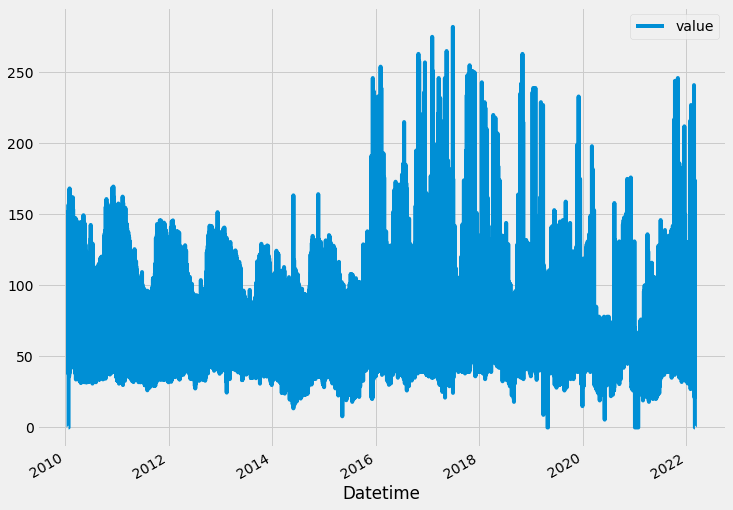

In [24]:
data.plot()

In [25]:
daily_data = data.resample(rule="D").sum()

daily_data = daily_data.asfreq('D')

daily_data.head(10)

,value
Datetime,
2010-01-25,3621.456
2010-01-26,4446.840
2010-01-27,4123.918
2010-01-28,4614.666
2010-01-29,4418.075
2010-01-30,3380.816
2010-01-31,3121.651
2010-02-01,4936.371
2010-02-02,4877.471


In [26]:
daily_data.index

DatetimeIndex(['2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01',
               '2010-02-02', '2010-02-03',
               ...
               '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', name='Datetime', length=4419, freq='D')

<AxesSubplot:xlabel='Datetime'>

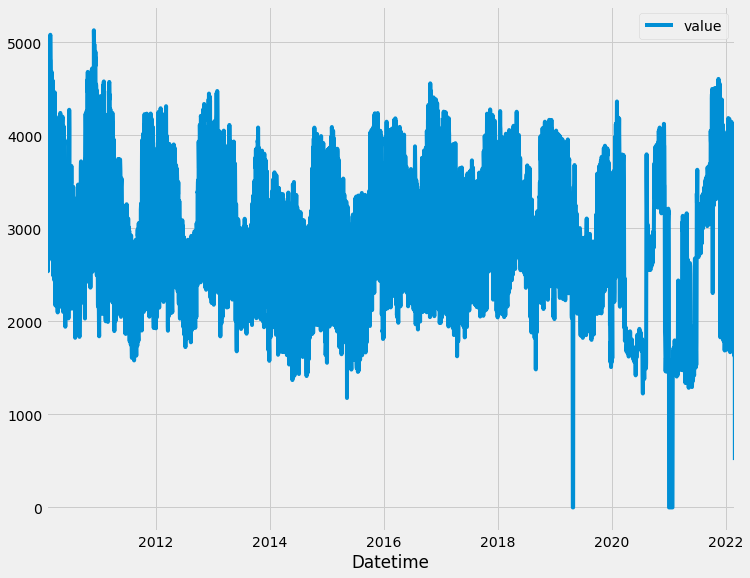

In [27]:
daily_data.plot()

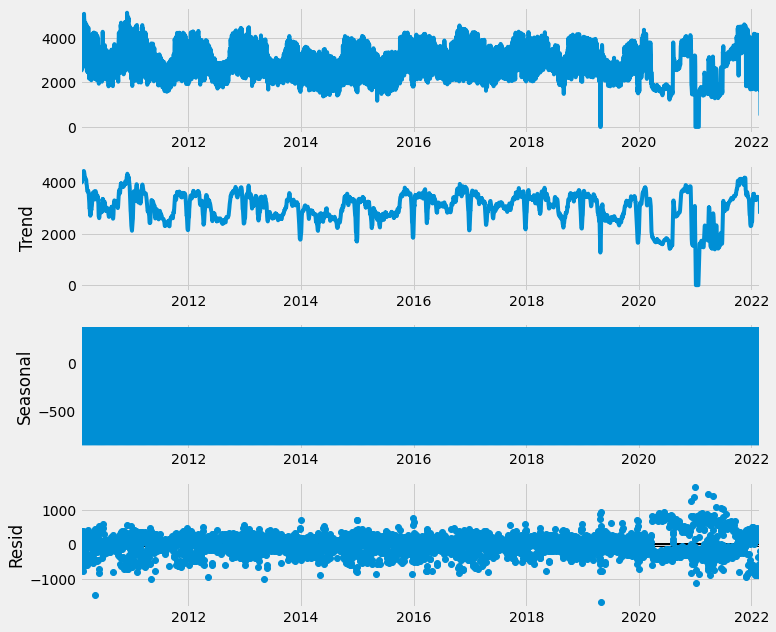

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_data, model='additive')

fig = decomposition.plot()

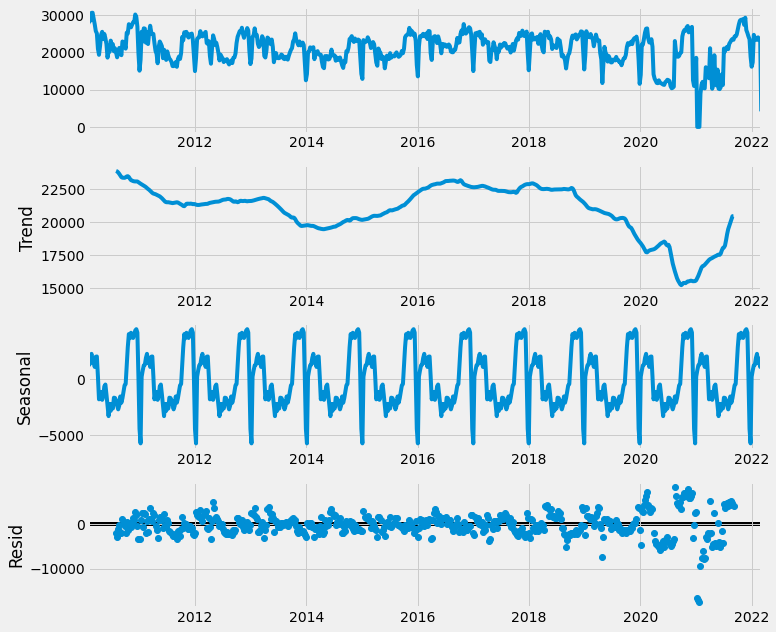

In [29]:
weekly_data = data.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data, model='additive')

fig = decomposition.plot()

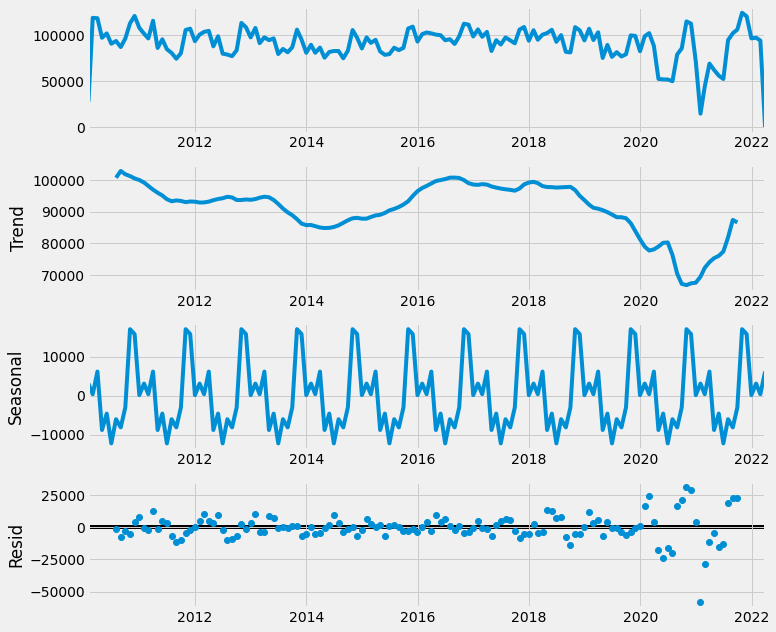

In [62]:
monthly_data = data.resample(rule='M').sum()
decomposition = seasonal_decompose(monthly_data, model='additive')

fig = decomposition.plot()

In [30]:
daily_data.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday'],
      dtype='object', name='Datetime', length=4419)

In [31]:
#Create new dataset for heatmap
heatmap_data = daily_data.copy()

#First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = daily_data.index.day_name()

#Next add the year as column and group the data up to annual day of the week level
heatmap_data['Year'] = heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Weekday_Name']).sum()

#Reset indices
heatmap_data = heatmap_data.reset_index()

# Drop 2022 as not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='value')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

heatmap_data.head(100)

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2010,183917.507,189129.461,187888.364,191960.936,180555.184,122620.528,115085.011
2011,177692.515,182343.677,179439.419,183118.630,172385.225,116516.769,108241.000
2012,178647.497,180838.141,178621.689,179948.838,171838.584,124383.822,118319.148
2013,172875.461,178301.460,174535.474,175330.357,167622.364,120260.997,111816.340
2014,163580.333,167573.080,166837.296,167773.220,158277.492,104391.374,95839.843
2015,175000.202,177658.499,174788.658,177984.524,167714.105,112369.201,102992.307
2016,189709.220,192904.864,191272.284,193785.482,187969.128,130098.671,120145.181
2017,184430.167,187810.995,185587.500,187339.001,178609.996,122407.996,118675.331
2018,183765.252,186136.851,184549.508,184865.665,179370.837,130038.501,122373.349


Text(0.5, 1.0, 'Heatmap - by Day of Week')

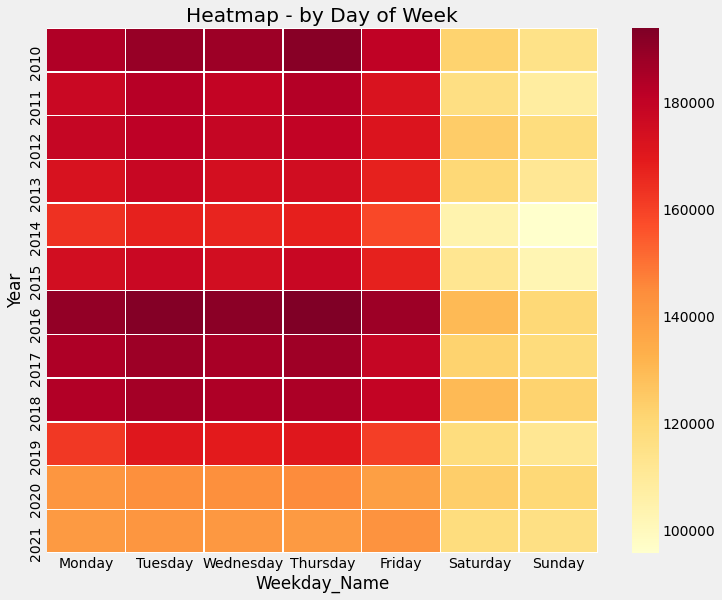

In [32]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True).set_title('Heatmap - by Day of Week')

In [33]:
# Create new dataset for heatmap
heatmap_data = data.copy()

# First we need to add weekdays as a column
heatmap_data['Hour'] = data.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Hour']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off 2018 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='value')

heatmap_data.head(100)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2010,28690.792,28597.198,28503.253,28719.402,29512.859,35982.609,44176.607,52160.301,60628.973,66788.949,...,68229.916,65869.976,60942.456,55644.022,51337.513,47661.059,43962.614,36223.957,30497.067,29169.836
2011,27933.669,27870.594,27849.184,27823.148,28647.521,33985.290,41204.785,49716.032,58059.653,63937.121,...,65315.229,63080.359,58402.002,53297.190,49014.188,45386.155,41225.606,34098.564,28846.364,28035.463
2012,30014.157,30045.553,29994.575,29944.798,31304.990,38066.132,44223.605,50919.197,58632.607,63911.277,...,64115.423,61580.892,56800.725,52012.552,48219.318,45297.412,40608.168,34102.330,30582.639,30240.925
2013,31824.684,31771.597,31761.706,31665.900,32293.610,36530.594,42507.238,49478.683,55658.087,60558.950,...,60608.917,58493.238,54202.738,49393.244,45814.135,42936.585,38988.209,34176.062,31957.348,31801.358
2014,27219.467,27344.413,27304.120,27183.715,27369.402,29892.222,36464.380,43783.463,50505.325,55283.989,...,58680.264,57639.716,54970.425,50896.956,46776.571,43495.604,39332.474,32525.333,28126.627,27214.754
2015,29162.976,29255.482,29087.167,29028.928,30167.545,38099.518,45896.836,50655.777,55379.207,59469.733,...,61150.219,59374.681,55329.984,51233.224,47838.468,44647.870,37266.538,31421.029,29508.598,29241.423
2016,33752.416,33714.881,33787.213,33571.714,37535.549,44086.001,49495.669,55083.097,60091.263,64649.430,...,66280.969,64965.301,60530.072,55423.072,52322.072,48698.572,41776.738,35923.238,34025.525,33775.065
2017,32476.333,32463.000,32249.499,32440.765,36123.432,41726.464,46877.999,52218.667,56440.499,61909.166,...,64659.449,63344.531,59656.414,54670.916,50297.167,46572.918,40447.000,34870.667,32830.334,32484.834
2018,35931.911,35847.241,35854.575,35667.911,36512.495,39770.412,45345.994,50859.242,55251.910,59611.477,...,62503.895,61858.396,59091.311,54645.229,51006.643,47773.326,43124.116,39236.905,37017.490,36334.411


Text(0.5, 1.0, 'Heatmap - by Hour of the day')

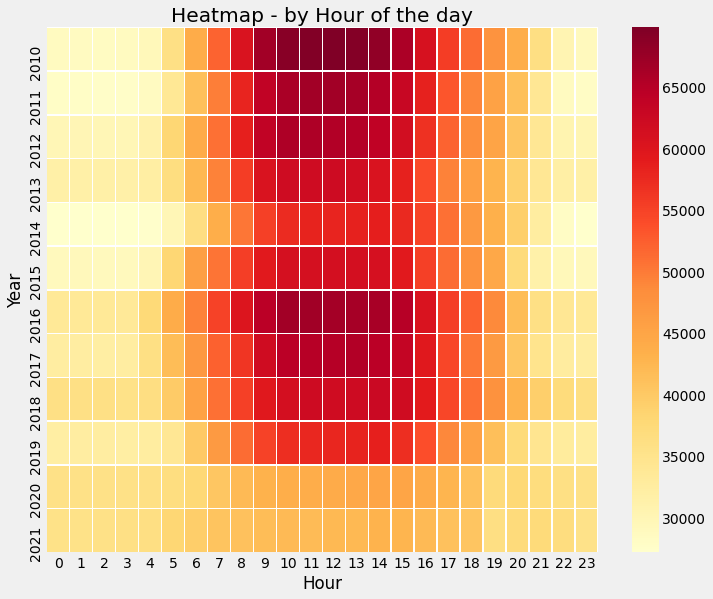

In [34]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True).set_title('Heatmap - by Hour of the day')

In [35]:
# Create new dataset for heatmap
heatmap_data = daily_data.copy()

# First we need to add weekdays as a column
heatmap_data['Month'] = daily_data.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Month']).sum()

# Reset index
heatmap_data = heatmap_data.reset_index()

# We drop off 2022 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Month', values='value')

# Reorder columns
heatmap_data = heatmap_data[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

heatmap_data.head(10)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2010,27727.422,118539.911,118139.704,96975.252,101721.117,90541.996,93508.186,86922.837,96113.412,112645.996,120620.642,107700.516
2011,101396.401,96276.963,115430.207,85974.279,95300.975,84610.580,80532.736,74318.770,80322.199,105450.263,106813.302,93310.560
2012,100489.762,103336.293,104465.431,87739.415,98620.043,79797.380,78799.940,77064.012,83503.024,113018.877,108382.687,97380.855
2013,107608.831,91162.150,97443.235,94410.679,96290.751,79429.215,84864.764,81317.443,86679.807,105800.614,95010.805,80724.159
2014,89364.195,80726.340,86404.436,75424.900,81647.300,82659.966,82630.484,74767.565,82968.305,105327.553,96938.896,85412.698
2015,97368.437,91481.441,94746.851,82189.997,78520.524,79357.107,86208.801,83608.788,86113.577,107020.545,109019.670,92871.758
2016,100912.828,102720.016,101726.999,100379.000,99744.998,94337.000,95402.996,90312.998,98555.000,112159.998,111218.000,98414.997
2017,106079.998,98051.999,103339.002,82664.999,94316.002,89681.998,97267.997,94182.002,90981.995,105838.996,108650.998,93805.000
2018,105150.998,94827.003,100376.998,102048.002,105624.996,92617.001,99828.999,81719.002,81171.962,108527.001,105077.003,94130.998


Text(0.5, 1.0, 'Heatmap - by Months of the Year')

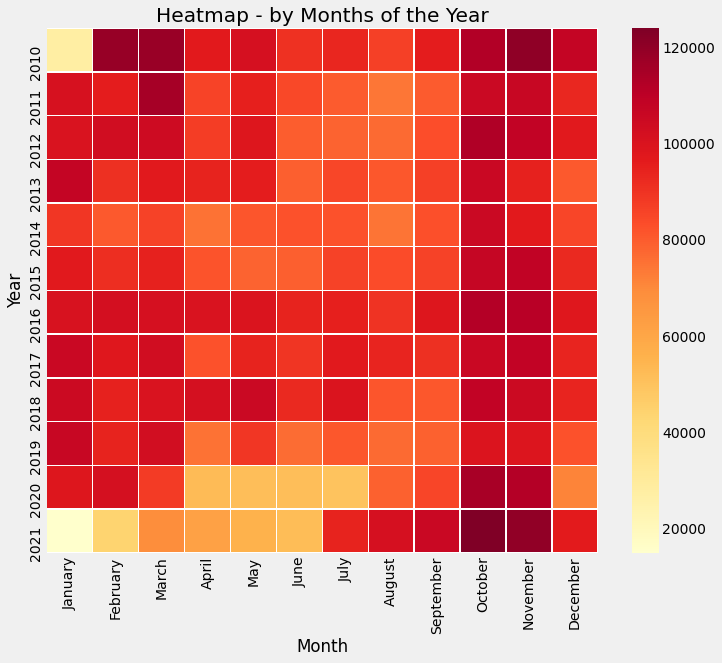

In [36]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True).set_title('Heatmap - by Months of the Year')

In [37]:
# First load the weather data
weather_data = pd.read_csv('WeatherData.csv')

weather_data.head(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 Z,0,Leicester,52.636878,-1.139759,280.53,NaN,279.94,278.68,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
1,1199149200,2008-01-01 01:00:00 Z,0,Leicester,52.636878,-1.139759,279.64,NaN,279.20,277.66,...,NaN,NaN,NaN,NaN,NaN,96,804,Clouds,overcast clouds,04n
2,1199152800,2008-01-01 02:00:00 Z,0,Leicester,52.636878,-1.139759,279.60,NaN,279.16,277.69,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
3,1199156400,2008-01-01 03:00:00 Z,0,Leicester,52.636878,-1.139759,279.89,NaN,279.60,278.20,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 Z,0,Leicester,52.636878,-1.139759,279.79,NaN,279.50,278.23,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
5,1199163600,2008-01-01 05:00:00 Z,0,Leicester,52.636878,-1.139759,279.80,NaN,279.65,278.34,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
6,1199167200,2008-01-01 06:00:00 Z,0,Leicester,52.636878,-1.139759,279.82,NaN,279.67,278.38,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
7,1199170800,2008-01-01 07:00:00 Z,0,Leicester,52.636878,-1.139759,279.26,NaN,279.11,277.60,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
8,1199174400,2008-01-01 08:00:00 Z,0,Leicester,52.636878,-1.139759,279.79,NaN,279.64,278.12,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
9,1199178000,2008-01-01 09:00:00 Z,0,Leicester,52.636878,-1.139759,279.85,NaN,279.70,278.10,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


In [38]:
eda_helper = EDA(weather_data)
eda_helper.summary()

Summary metrics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,122736,NaN,NaN,NaN,61367.5,35431,0,30683.8,61367.5,92051.2,122735
dt,122736,NaN,NaN,NaN,1.42007e+09,1.27552e+08,1.19915e+09,1.30961e+09,1.42007e+09,1.53053e+09,1.64099e+09
dt_iso,122736,122736,2016-01-14 20:00:00 Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timezone,122736,NaN,NaN,NaN,2104.11,1774.13,0,0,3600,3600,3600
city_name,122736,1,Leicester,122736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,122736,NaN,NaN,NaN,52.6369,7.10546e-15,52.6369,52.6369,52.6369,52.6369,52.6369
lon,122736,NaN,NaN,NaN,-1.13976,2.22046e-16,-1.13976,-1.13976,-1.13976,-1.13976,-1.13976
temp,122736,NaN,NaN,NaN,283.601,5.91057,262.43,279.32,283.44,287.69,308.03
visibility,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dew_point,122736,NaN,NaN,NaN,280.44,5.00381,237.92,276.75,280.7,284.23,295.36


In [39]:
weather_data = weather_data[['dt_iso', 'temp']]
weather_data.groupby(['dt_iso']).mean()
weather_data = weather_data.set_index('dt_iso')
weather_data.index = pd.to_datetime(weather_data.index)

# Sort to make sure plotting works
weather_data = weather_data.sort_values(by='dt_iso', ascending=True)

weather_data.head(10)

,temp
dt_iso,
2008-01-01 00:00:00+00:00,280.53
2008-01-01 01:00:00+00:00,279.64
2008-01-01 02:00:00+00:00,279.60
2008-01-01 03:00:00+00:00,279.89
2008-01-01 04:00:00+00:00,279.79
2008-01-01 05:00:00+00:00,279.80
2008-01-01 06:00:00+00:00,279.82
2008-01-01 07:00:00+00:00,279.26
2008-01-01 08:00:00+00:00,279.79


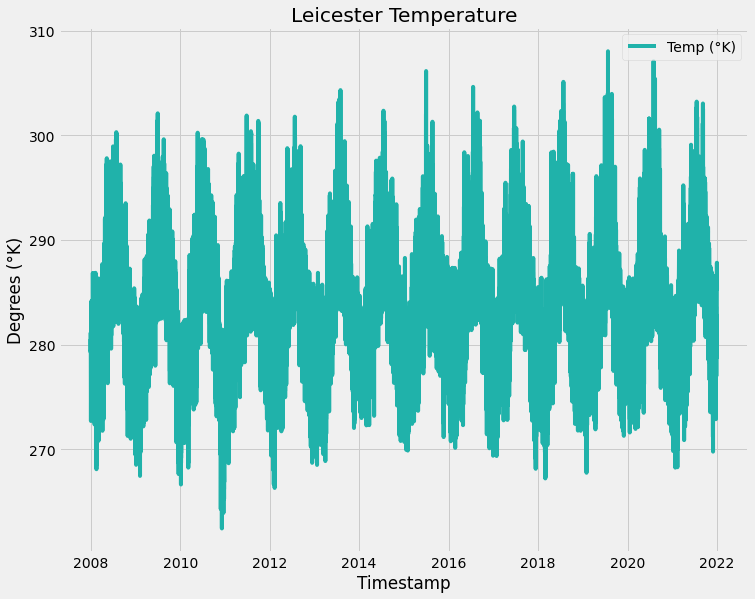

In [40]:
plt.plot(weather_data, label='Temp (°K)', color='lightseagreen')

# Plot Labels, Legends etc
plt.title('Leicester Temperature')
plt.legend(loc='best')
plt.xlabel("Timestamp")
plt.ylabel("Degrees (°K)")
plt.legend(loc='best')

plt.show()

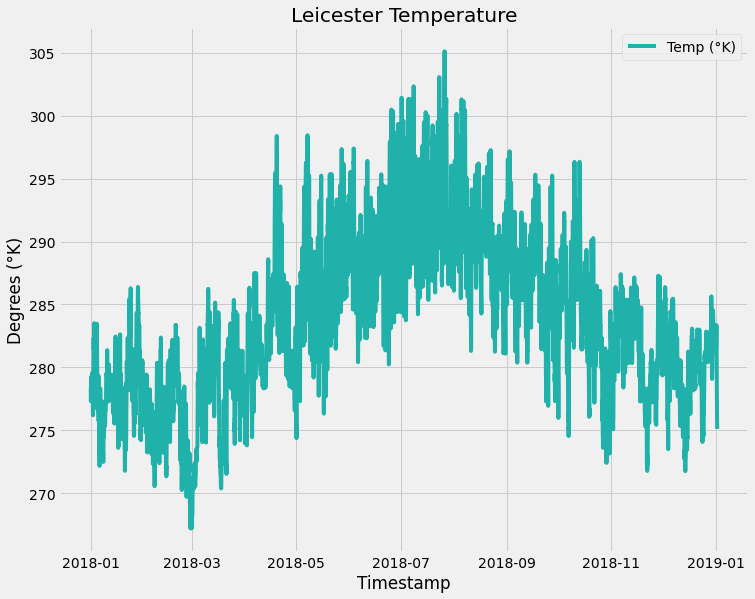

In [41]:
plt.plot(weather_data['2018-01-01':'2019-01-01'], label='Temp (°K)', color='lightseagreen')

# Plot Labels, Legends etc
plt.title('Leicester Temperature')
plt.legend(loc='best')
plt.xlabel("Timestamp")
plt.ylabel("Degrees (°K)")
plt.legend(loc='best')

plt.show()

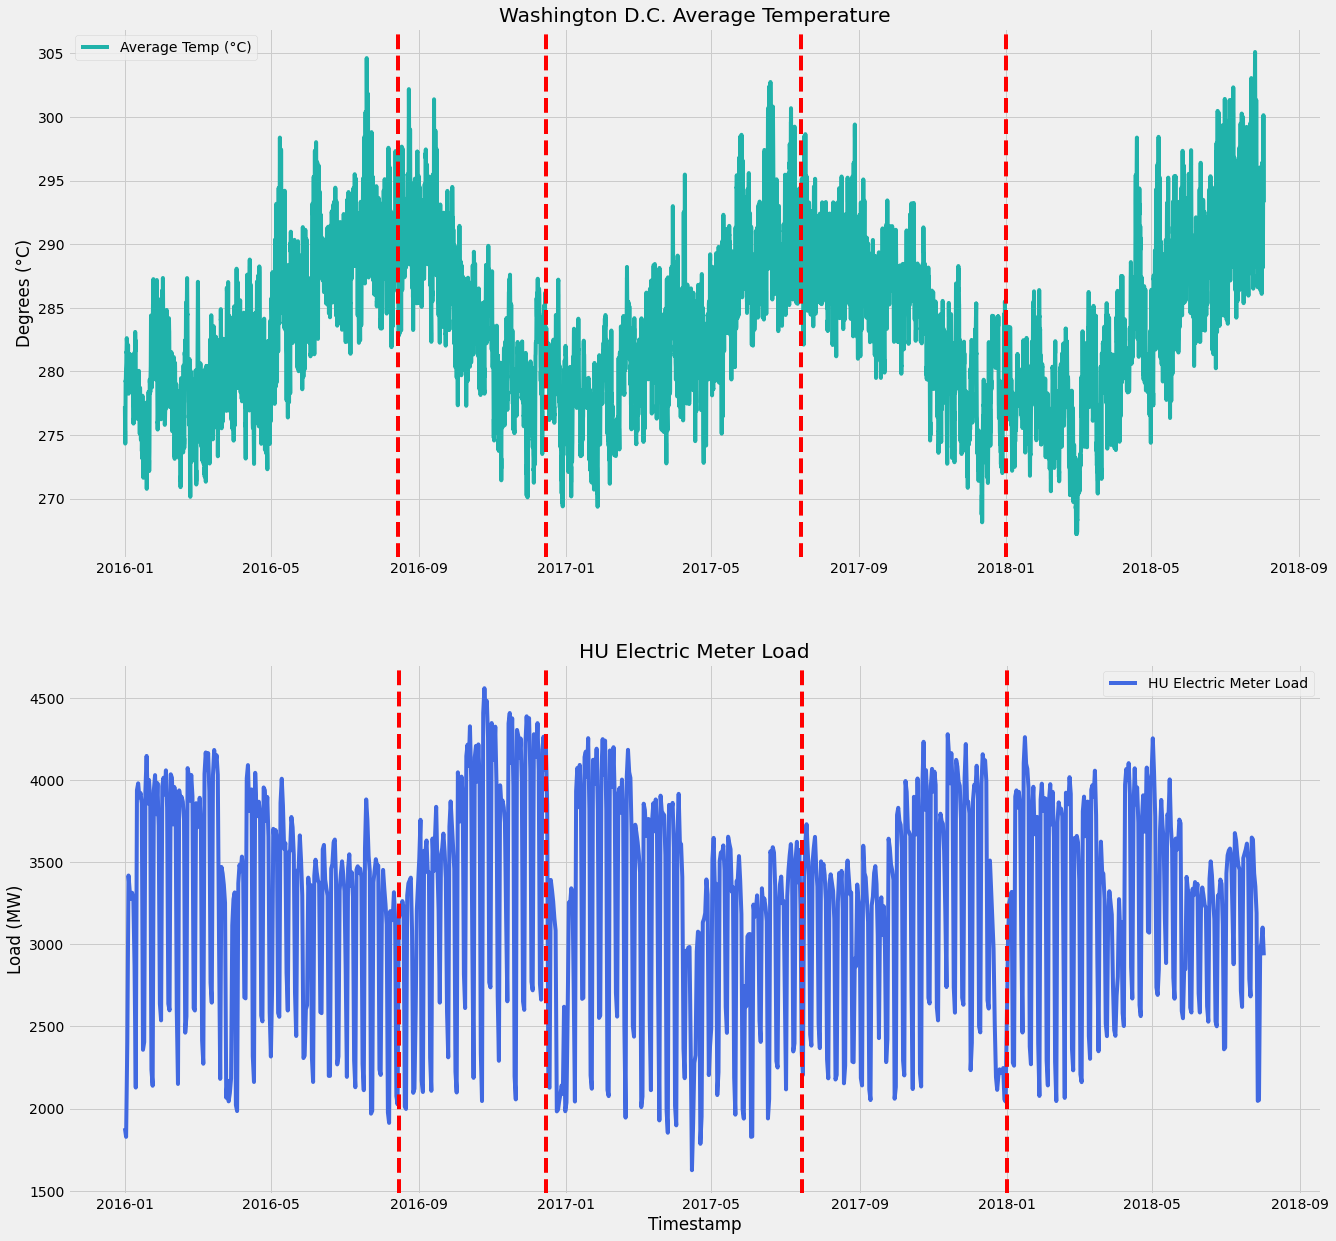

In [42]:
fig, ax = plt.subplots(2,1, figsize=(20,20))

# Plot 1
ax[0].plot(weather_data['2016-01-01':'2018-08-02'], label='Average Temp (°C)', color='lightseagreen')
ax[0].set_title('Washington D.C. Average Temperature')
ax[0].set_ylabel("Degrees (°C)")
ax[0].legend(loc='best')

# Plot 2
ax[1].plot(daily_data['2016-01-01':'2018-08-02'], label='HU Electric Meter Load', color='royalblue')
ax[1].set_title('HU Electric Meter Load')
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel("Load (MW)")
ax[1].legend(loc='best')

# Add vertical lines to emphasis point
import datetime as dt
ax[0].axvline(dt.datetime(2016, 8, 15), color='red', linestyle='--')
ax[1].axvline(dt.datetime(2016, 8, 15), color='red', linestyle='--')
ax[0].axvline(dt.datetime(2016, 12, 15), color='red', linestyle='--')
ax[1].axvline(dt.datetime(2016, 12, 15), color='red', linestyle='--')
ax[0].axvline(dt.datetime(2017, 7, 15), color='red', linestyle='--')
ax[1].axvline(dt.datetime(2017, 7, 15), color='red', linestyle='--')
ax[0].axvline(dt.datetime(2018, 1, 1), color='red', linestyle='--')
ax[1].axvline(dt.datetime(2018, 1, 1), color='red', linestyle='--')

plt.show()

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

# XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score